In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('hotel_reviews_final.pkl')
df.head()

index,name,room_type,nights_stayed,month_stayed,occupant_type,from_country,review_score,date_reviewed,short_review,positive_review,negative_review,url
0,Gene,,2 nights,January 2020,Couple,Philippines,10,January 2020,Exceptional,I love the pool coz I was so lucky to swim alo...,nothing..,https://www.booking.com/hotel/ph/meranti.html?...
1,Sheila,Executive Twin Room,1 night,November 2022,Family,Philippines,7.0,November 2022,"Overall, we love the place, the staff and all...",We like that all the staff are very friendly. ...,I'm unhappy that we only got plated breakfast ...,https://www.booking.com/hotel/ph/meranti.html?...
2,Greggy,Executive Twin Room,1 night,October 2022,Solo traveler,Philippines,8.0,October 2022,Nice,Simple and comfortable,the location,https://www.booking.com/hotel/ph/meranti.html?...
3,Tay,Executive Twin Room,2 nights,October 2022,Family,Cambodia,7.0,October 2022,Good,Staff,Lack of service facilties not even coffee in r...,https://www.booking.com/hotel/ph/meranti.html?...
4,Joseph,Executive Twin Room,1 night,July 2022,Family,Philippines,9.0,July 2022,"Overall, it was a very comfortable experience...",The room was very clean and everything we need...,,https://www.booking.com/hotel/ph/meranti.html?...


In [3]:
df1 = pd.read_pickle('hotel_surroundings_link.pkl')
df1.head()

,hotel_name_,nearest_airport,nearest_resto,nearest_train,nearest_ocean,nearest_other,number_close,nearest_other_2km,url
0,RedDoorz near East Avenue Medical Center,15.0,0.10,12.0,12.0,0.90,21,3,https://www.booking.com/hotel/ph/reddoorz-near...
1,Skylab Guesthouse,12.0,0.20,11.0,6.0,0.95,21,2,https://www.booking.com/hotel/ph/skylab213b.ht...
2,The Excelsior Hotel Las Piñas,8.0,0.04,17.0,11.0,0.55,20,5,https://www.booking.com/hotel/ph/the-excelsior...
3,Rothman Hotel,8.0,0.10,0.9,0.3,0.25,19,10,https://www.booking.com/hotel/ph/rothman-manil...
4,OYO 772 Remedios Apartment,7.0,0.10,0.5,1.0,0.60,19,10,https://www.booking.com/hotel/ph/oyo-772-remed...


In [4]:
df_merge = pd.merge(df, df1, how = 'left', on = 'url')
df_merge

,name,room_type,nights_stayed,month_stayed,occupant_type,from_country,review_score,date_reviewed,short_review,positive_review,negative_review,url,hotel_name_,nearest_airport,nearest_resto,nearest_train,nearest_ocean,nearest_other,number_close,nearest_other_2km
0,Gene,,2 nights,January 2020,Couple,Philippines,10,January 2020,Exceptional,I love the pool coz I was so lucky to swim alo...,nothing..,https://www.booking.com/hotel/ph/meranti.html?...,Privato Quezon City - Multiple Use Hotel,13.0,0.01,16.0,8.00,0.80,21,2
1,Sheila,Executive Twin Room,1 night,November 2022,Family,Philippines,7.0,November 2022,"Overall, we love the place, the staff and all...",We like that all the staff are very friendly. ...,I'm unhappy that we only got plated breakfast ...,https://www.booking.com/hotel/ph/meranti.html?...,Privato Quezon City - Multiple Use Hotel,13.0,0.01,16.0,8.00,0.80,21,2
2,Greggy,Executive Twin Room,1 night,October 2022,Solo traveler,Philippines,8.0,October 2022,Nice,Simple and comfortable,the location,https://www.booking.com/hotel/ph/meranti.html?...,Privato Quezon City - Multiple Use Hotel,13.0,0.01,16.0,8.00,0.80,21,2
3,Tay,Executive Twin Room,2 nights,October 2022,Family,Cambodia,7.0,October 2022,Good,Staff,Lack of service facilties not even coffee in r...,https://www.booking.com/hotel/ph/meranti.html?...,Privato Quezon City - Multiple Use Hotel,13.0,0.01,16.0,8.00,0.80,21,2
4,Joseph,Executive Twin Room,1 night,July 2022,Family,Philippines,9.0,July 2022,"Overall, it was a very comfortable experience...",The room was very clean and everything we need...,,https://www.booking.com/hotel/ph/meranti.html?...,Privato Quezon City - Multiple Use Hotel,13.0,0.01,16.0,8.00,0.80,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77951,Anonymous,,2 nights,January 2021,Solo traveler,Philippines,9.0,January 2021,Wonderful,There are no comments available for this review,,https://www.booking.com/hotel/ph/airo.html?lab...,Airo Hotel Manila,8.0,0.10,1.0,0.35,0.02,19,11
77952,Anonymous,,2 nights,December 2020,Group,Philippines,8.0,December 2020,Very Good,There are no comments available for this review,,https://www.booking.com/hotel/ph/airo.html?lab...,Airo Hotel Manila,8.0,0.10,1.0,0.35,0.02,19,11
77953,Anonymous,,1 night,October 2020,Family,Philippines,8.0,October 2020,Very Good,There are no comments available for this review,,https://www.booking.com/hotel/ph/airo.html?lab...,Airo Hotel Manila,8.0,0.10,1.0,0.35,0.02,19,11
77954,Anonymous,,3 nights,February 2021,Solo traveler,Philippines,10,February 2021,Exceptional,There are no comments available for this review,,https://www.booking.com/hotel/ph/airo.html?lab...,Airo Hotel Manila,8.0,0.10,1.0,0.35,0.02,19,11


In [5]:
df_merge['review_score'] = df_merge['review_score'].astype('float')

In [6]:
def class_stay(x):
    if x > 7.5:
        return 'positive'
    else:
        return 'negative'

def round_score(x):
    return round(x, 0)

In [7]:
df_merge['stay'] = df_merge['review_score'].apply(class_stay)
df_merge['score_int'] = df_merge['review_score'].apply(round_score)
df_merge

,name,room_type,nights_stayed,month_stayed,occupant_type,from_country,review_score,date_reviewed,short_review,positive_review,...,hotel_name_,nearest_airport,nearest_resto,nearest_train,nearest_ocean,nearest_other,number_close,nearest_other_2km,stay,score_int
0,Gene,,2 nights,January 2020,Couple,Philippines,10.0,January 2020,Exceptional,I love the pool coz I was so lucky to swim alo...,...,Privato Quezon City - Multiple Use Hotel,13.0,0.01,16.0,8.00,0.80,21,2,positive,10.0
1,Sheila,Executive Twin Room,1 night,November 2022,Family,Philippines,7.0,November 2022,"Overall, we love the place, the staff and all...",We like that all the staff are very friendly. ...,...,Privato Quezon City - Multiple Use Hotel,13.0,0.01,16.0,8.00,0.80,21,2,negative,7.0
2,Greggy,Executive Twin Room,1 night,October 2022,Solo traveler,Philippines,8.0,October 2022,Nice,Simple and comfortable,...,Privato Quezon City - Multiple Use Hotel,13.0,0.01,16.0,8.00,0.80,21,2,positive,8.0
3,Tay,Executive Twin Room,2 nights,October 2022,Family,Cambodia,7.0,October 2022,Good,Staff,...,Privato Quezon City - Multiple Use Hotel,13.0,0.01,16.0,8.00,0.80,21,2,negative,7.0
4,Joseph,Executive Twin Room,1 night,July 2022,Family,Philippines,9.0,July 2022,"Overall, it was a very comfortable experience...",The room was very clean and everything we need...,...,Privato Quezon City - Multiple Use Hotel,13.0,0.01,16.0,8.00,0.80,21,2,positive,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77951,Anonymous,,2 nights,January 2021,Solo traveler,Philippines,9.0,January 2021,Wonderful,There are no comments available for this review,...,Airo Hotel Manila,8.0,0.10,1.0,0.35,0.02,19,11,positive,9.0
77952,Anonymous,,2 nights,December 2020,Group,Philippines,8.0,December 2020,Very Good,There are no comments available for this review,...,Airo Hotel Manila,8.0,0.10,1.0,0.35,0.02,19,11,positive,8.0
77953,Anonymous,,1 night,October 2020,Family,Philippines,8.0,October 2020,Very Good,There are no comments available for this review,...,Airo Hotel Manila,8.0,0.10,1.0,0.35,0.02,19,11,positive,8.0
77954,Anonymous,,3 nights,February 2021,Solo traveler,Philippines,10.0,February 2021,Exceptional,There are no comments available for this review,...,Airo Hotel Manila,8.0,0.10,1.0,0.35,0.02,19,11,positive,10.0


### Plot mean estab with reviews

<AxesSubplot: xlabel='mean', ylabel='stay'>

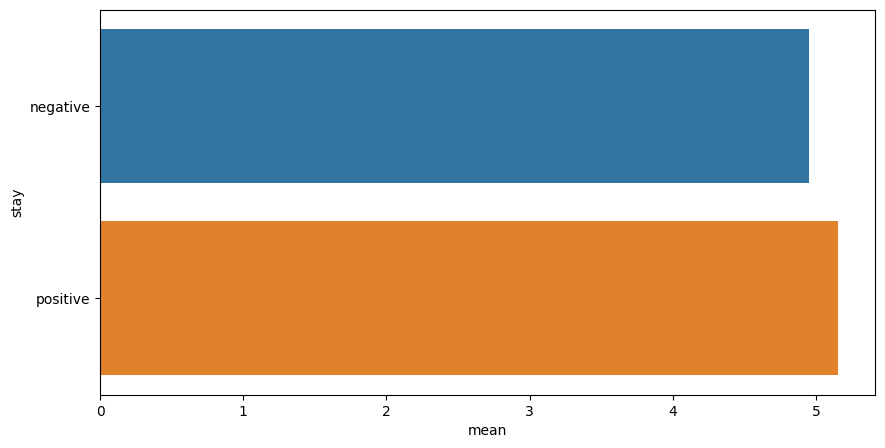

In [10]:
df_estab_num = df_merge.groupby(by = ['stay'])['nearest_other_2km'].mean().reset_index(name = 'mean')
df_estab_num

fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(df_estab_num, x = 'mean', y = 'stay')

<AxesSubplot: xlabel='mean', ylabel='stay'>

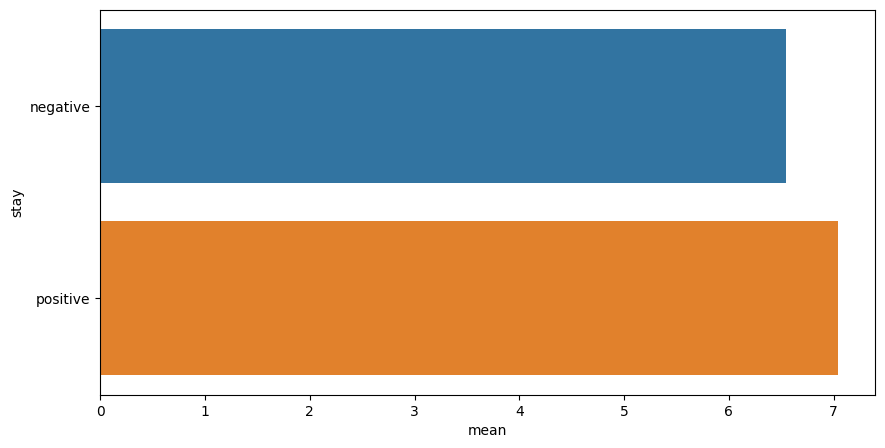

In [15]:
df_estab_train = df_merge.groupby(by = ['stay'])['nearest_train'].mean().reset_index(name = 'mean')

fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(df_estab_train, x = 'mean', y = 'stay')

In [12]:
df_estab_resto = df_merge.groupby(by = ['stay'])['nearest_resto'].mean().reset_index(name = 'mean')
df_estab_resto

,stay,mean
0,negative,0.177296
1,positive,0.153536


### By Scores

Text(0.5, 0, 'Average Number of Attractions')

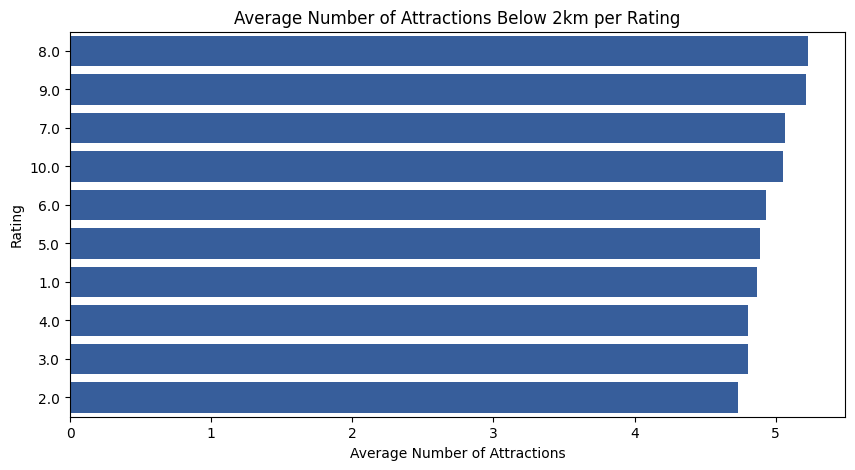

In [27]:
df_estab_num = df_merge.groupby(by = ['score_int'])['nearest_other_2km'].mean().reset_index(name = 'mean')
df_estab_num

fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(df_estab_num, x = 'mean', y = 'score_int', orient='h', color = '#275aab',
           order = df_estab_num.sort_values('mean', ascending = False).score_int)

ax.set_title('Average Number of Attractions Below 2km per Rating')
ax.set_ylabel('Rating')
ax.set_xlabel('Average Number of Attractions')

Text(0.5, 0, 'Average Distance to Public Transpo')

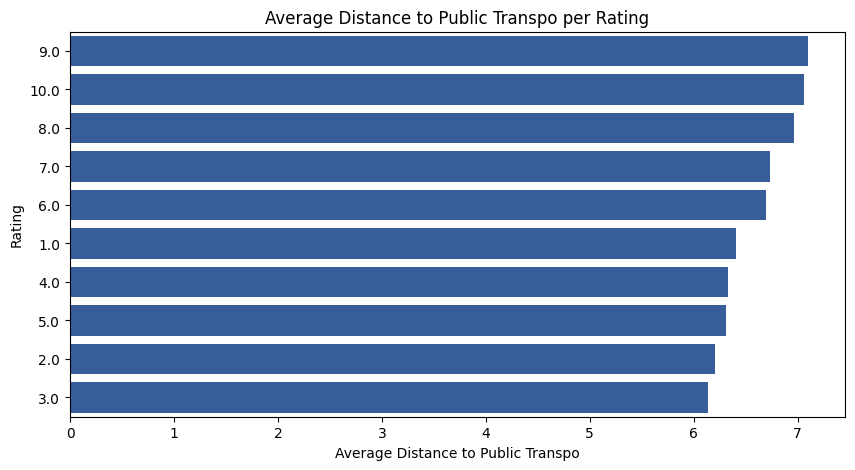

In [32]:
df_rate_train = df_merge.groupby(by = ['score_int'])['nearest_train'].mean().reset_index(name = 'mean')
# df_rate_train

fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(df_rate_train, x = 'mean', y = 'score_int', orient='h', color = '#275aab',
           order = df_rate_train.sort_values('mean', ascending = False).score_int)

ax.set_title('Average Distance to Public Transpo per Rating')
ax.set_ylabel('Rating')
ax.set_xlabel('Average Distance to Public Transpo')

Text(0.5, 0, 'Average Distance to Airport')

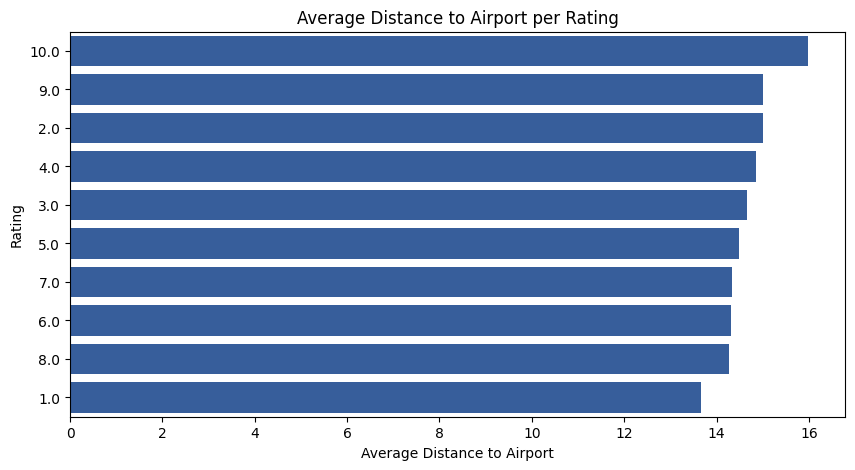

In [34]:
df_rate_airport = df_merge.groupby(by = ['score_int'])['nearest_airport'].mean().reset_index(name = 'mean')
# df_rate_train

fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(df_rate_airport, x = 'mean', y = 'score_int', orient='h', color = '#275aab',
           order = df_rate_airport.sort_values('mean', ascending = False).score_int)

ax.set_title('Average Distance to Airport per Rating')
ax.set_ylabel('Rating')
ax.set_xlabel('Average Distance to Airport')

In [ ]:
df_rate_airport = df_merge.groupby(by = ['score_int'])['nearest_airport'].mean().reset_index(name = 'mean')
# df_rate_train

fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(df_rate_airport, x = 'mean', y = 'score_int', orient='h', color = '#275aab',
           order = df_rate_airport.sort_values('mean', ascending = False).score_int)

ax.set_title('Average Distance to Airport per Rating')
ax.set_ylabel('Rating')
ax.set_xlabel('Average Distance to Airport')

In [3]:
for i in range(50):
    print(f"{i}. ")

0. 
1. 
2. 
3. 
4. 
5. 
6. 
7. 
8. 
9. 
10. 
11. 
12. 
13. 
14. 
15. 
16. 
17. 
18. 
19. 
20. 
21. 
22. 
23. 
24. 
25. 
26. 
27. 
28. 
29. 
30. 
31. 
32. 
33. 
34. 
35. 
36. 
37. 
38. 
39. 
40. 
41. 
42. 
43. 
44. 
45. 
46. 
47. 
48. 
49. 
